<a href="https://colab.research.google.com/github/prakhar8583/DEEPLEARNING-PROJECT/blob/main/Transferleraning_projectintensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow==2.15.0 keras==2.15.0 tensorflow-hub==0.15.0 # thsis line of the code is use to resolve the error If you are not use this code you might we suffer to this probelm-ValueError: Only instances of keras.Layer can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7cb24ee442d0> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)


In [ ]:
import numpy as np
import matplotlib.pylab as  plt
import tensorflow as tf
import tensorflow_hub as hub
import PIL.Image as Image
import tf_keras

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
classifier_url="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2"
# thats the url for pretrained model(mobile net model ) That is the state of the art model these day I mean Really great mobel

In [ ]:
# the image That model is accept is 224*224
imShape=(224,224)
# this is a classification model#
C=tf.keras.Sequential([
    hub.KerasLayer(classifier_url,input_shape=imShape+(3,))## Here we have the model basically -- hub.keraslayers(then we have Classifer_url.input shape parameters=that is basically The imageshape+A tupple of threethat make it as(224*224*3))
])

Let see it is work It has To import this and bulid a classifier model , It may Take While For that

In [ ]:
# lets Copy some Images and Cheack the performance Of this clssifer
I=Image.open('/content/download.jfif').resize(imShape)# We open Image and We resize As the requriend Size

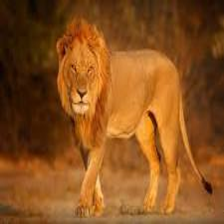

In [ ]:
# let Display the Images as well
I

Lets See how Classifer actually Classifier actually tag this Images a

In [ ]:
# First of all We resacle The Images
I=np.array(I)/255.0# we resacle this Images from 0 to 1

In [ ]:
I.shape

(224, 224, 3)

In [ ]:
# the Result Of the Classifier Is In variable R is C.predict(I[lets add new axis{just the way moble net acctually recevies the image axis}])
r=C.predict(I[np.newaxis,...])# that will add another axis , which means this is only one image so that will make it (1*224*224*3)

1/1 [==============================] - 0s 460ms/step


In [ ]:
# lets see the shape of the result as well
r.shape

(1, 1001)

so this model basically has 1000 classes and One extra class which is other than This (mean Non Of this 1000 class )

In [ ]:
# lets see the predicated class Id
pc=np.argmax(r[0],axis=-1)# that Will give the Id of the predicted class , In this case this 292
pc

292

that Will give the Id of the predicted class , In this case this 292 But what is the actual class label for this 292, so we have to see that the label of image net data set beacuse this classifer using mobile net version  2 it actually base on Images Net data set

In [ ]:
# lets Download The Images Net labels
# so lets first have Lable path(lp)
lp=tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')

So If you done no mistake It should brings the labels to us

In [ ]:
# lets see it works Then we get the labls, so Image nets lables
imnet_labls=np.array(open(lp).read().splitlines())
# now we have Image labels

// we write some code to actually plot the original images as well as the predicted label because this 292 is Id , so what is actually string what does the string for this id

Text(0.5, 1.0, 'lion')

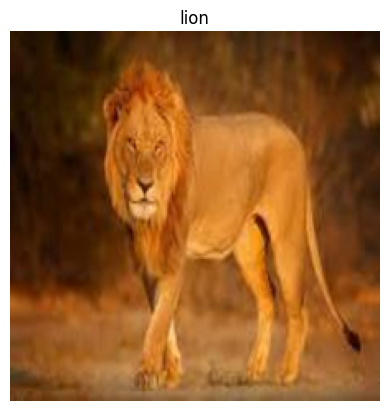

In [ ]:
plt.imshow(I)
plt.axis('off')
# pcn(predicate Class Name) is imnet _ labels[preicate class Id(pc)]
pcn=imnet_labls[pc]
# lets show the predicated class name is the tittle of the image
plt.title(pcn)


// you can see that classifer is prediacted this images as Lion Label which is shown over thi title of the images



*   Now You can See that upper code is basically A classification model That predicte the class of give Image  {Now You Know How the bulit in classsification is work}



*   Next What We do we download some of the data or may use availbe data , Lets Transfer this model (this classifiction model to from the data to the new data set we have


In [ ]:
import os

In [ ]:
# lets first Download some data
# Download and extract the dataset
data_root = tf.keras.utils.get_file(
     'flower_photos',
    origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True,
     # after this line of the code author is not writing we use this code from the deepshake becuse it is throughing a error directory is not found
    cache_dir='/tmp',  # Change if needed
    cache_subdir='flowers'

)

# lets download that data

In [ ]:
# now we call our Image Generator just to get the data out
image_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
# then we have our Image Data let me call this image Data as imdata
imdata=image_generator.flow_from_directory(str(data_root),target_size=imShape)# target size same as the image size before

Found 3670 images belonging to 5 classes.


////- lets make certain batches form there, like imB(imageBatch),lbB(lableBatch)

In [ ]:
for imB,lbB in imdata:
  # lets print the image batch shape and label batch shape
  print(imB.shape)
  print(lbB.shape)
  break

(32, 224, 224, 3)
(32, 5)


// If you see that ImageBatch(imB) -- we have 32 images and each image is (24*24*3)
// for 32 images we have 5 classes these are there lables

In [ ]:
# before actually transfering the model on to this data let see the bulit in classigfer how the bulit in classifer is responseon these images
# rB-- result of the batch
rB=C.predict(imB)
rB.shape# the shape of the result is 32*1001

1/1 [==============================] - 2s 2s/step


(32, 1001)

In [ ]:
# Now lets see what are the predicated class name , we already have the images net labels
pcn=imnet_labls[np.argmax(rB,axis=-1)]
pcn

array(['totem pole', 'car mirror', 'grocery store', 'daisy', 'daisy',
       'picket fence', 'daisy', 'jackfruit', 'hip', 'mask', 'pier',
       'vase', 'daisy', 'daisy', 'daisy', 'rapeseed', 'crane', 'conch',
       "yellow lady's slipper", 'daisy', 'daisy', 'picket fence', 'daisy',
       'lemon', 'cardoon', 'daisy', 'pot', 'strawberry', 'daisy',
       'coral fungus', 'spider web', 'artichoke'], dtype='<U30')

these are the class name that is given by the predefined model or the model we alredy having so

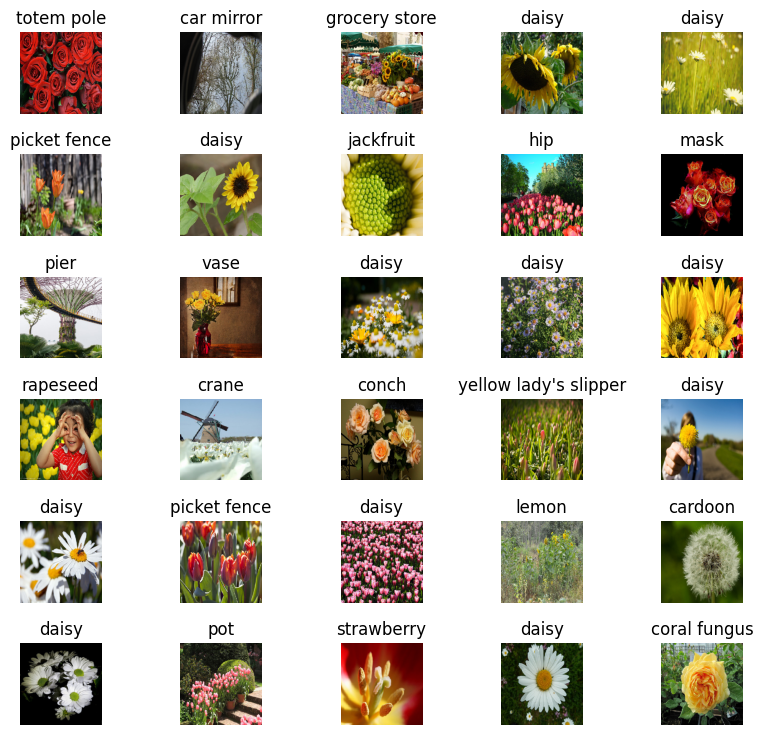

In [ ]:
plt.figure(figsize=(10,9))# that is figure size lets that is 10*9
# lets me draw these 32 images and there coressponding lables the bulit in clssifer has predicting
plt.subplots_adjust(hspace=0.5)
for i in range(30):
  plt.subplot(6,5,i+1)# 6,5 is the gride size=6*5
  plt.imshow(imB[i])
  plt.title(pcn[i])
  plt.axis('off')

# Transfer leraning starting from here



*   Now lets actually download the version of the classifer without the fully connected layer, lets called that as the headless layers or headless model



In [ ]:
# Now lets actually download the version of the classifer without the fully connected layer, lets called that as the headless layers
# that headlessmodel is availbe at the same location hud have these kind of the model have which does not have the fully connected layes
headlessModel_url="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2"

thats the url of the model ,


Now basically we bulid this model {headless model}

In [ ]:
headLessModel=hub.KerasLayer(headlessModel_url,input_shape=imShape+(3,))

In [ ]:
# now we basiclly extract the feature of our  batch
# fImB--- Feature of the images Batch
fImB=headLessModel(imB)# in this model we give the Images Batch(imB), and it will give us the feature
# lets see the shape of this matrix
fImB.shape
# so the feture vector basiclly has 1280 dimesions and 32 such images, sothat the feature extractor work

TensorShape([32, 1280])

Now What we do is we actually set these headless model to not trainable , so set the trainable parameter to false

In [ ]:
headLessModel.trainable=False# that means if we jion the fully connected layer on the top of that , the parameter in this particular model will no longer training so these are fixed parameters


In [ ]:
# Now Bulid Our Own Models
newModel=tf.keras.Sequential([
    headLessModel,
    # we are Going to add the fully connected layers
    tf.keras.layers.Dense(imdata.num_classes,activation="softmax"),# where the total number of the calsses is ImData.num_class,
])

In [ ]:
# Instantiate the Adam optimizer
adam_optimizer = tf.keras.optimizers.Adam()

In [ ]:
newModel.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits='True'),
    metrics=['acc'])

In [ ]:
newModel.fit(imdata,epochs=10)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/backend.py:5575: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


115/115 [==============================] - 104s 878ms/step - loss: 0.6281 - acc: 0.7752
Epoch 2/10
115/115 [==============================] - 95s 829ms/step - loss: 0.3337 - acc: 0.8858
Epoch 3/10
115/115 [==============================] - 93s 810ms/step - loss: 0.2665 - acc: 0.9142
Epoch 4/10
115/115 [==============================] - 100s 870ms/step - loss: 0.2237 - acc: 0.9330
Epoch 5/10
115/115 [==============================] - 99s 857ms/step - loss: 0.1919 - acc: 0.9414
Epoch 6/10
115/115 [==============================] - 99s 860ms/step - loss: 0.1683 - acc: 0.9520
Epoch 7/10
115/115 [==============================] - 100s 871ms/step - loss: 0.1518 - acc: 0.9578
Epoch 8/10
115/115 [==============================] - 99s 849ms/step - loss: 0.1378 - acc: 0.9643
Epoch 9/10
115/115 [==============================] - 98s 849ms/step - loss: 0.1226 - acc: 0.9708
Epoch 10/10
115/115 [==============================] - 102s 890ms/step - loss: 0.1120 - acc: 0.9730


///-- now lets actually see let actually classify our data and check what is the performance on our data


Becuse Our data or new data contain only 5 lables, so the now the calssifer will return only five labels

In [ ]:
# lets bulid the class name , I am Buliding these name because I know which id is where we can read this data as well
cn=np.array(['Daisy','Dandelion','Roses', 'Sunflowes','Tulips'])# these are the class name with respect to ID, so daisy have id 0,1,2,3,4

In [ ]:
# Now lets find out the predicate labels for label Batch
p=newModel.predict(imB)
p_ids=np.argmax(p,axis=-1)
pcn=cn[p_ids]

1/1 [==============================] - 1s 1s/step


In [ ]:
# now see the actuale labels
l_ids=np.argmax(lbB,axis=-1)

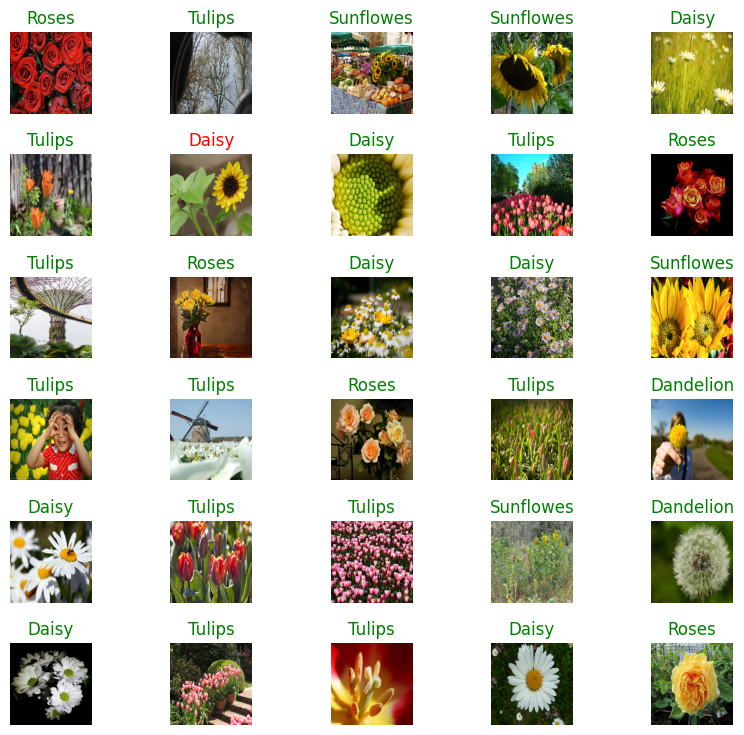

In [ ]:
# now plot the images and see how the transfer learning work on the data
# for example plot the images that coreectly calssified as green and those are not correctly classifed as red color
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for i in range(30):
  plt.subplot(6,5,i+1)
  plt.imshow(imB[i])
  color='green' if p_ids[i]==l_ids[i]else'red'
  plt.title(pcn[i].title(),color=color)
  plt.axis('off')


that is how we use tranfer leraing ,


Note---- Once the model is made headless one should follow the whole validation as well as testing process as well all the superivsed learing data